<a href="https://colab.research.google.com/github/sajan-sarker/machine-learning/blob/main/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math, copy
np.set_printoptions(precision = 2)

******
**Implementing Gradient calculation function**

In [3]:
def compute_gradient(X_train, y_train, w, b):
  """
  Compute the cost (mean squared error) for linear regression.

  Args:
    X_train (numpy array): The input features matrix of shape (m, n) where 'm' is the number of examples and 'n' is the number of features.
    y_train (numpy array): The output/target values vector of shape (m, ).
    w (numpy array): The weight vector of shape (n, ).
    b (scalar): The bias term for the model.
  Retuns:
    dj_db (scalar): The gradient of the cost function with respect to the bias term 'b'.
    dj_dw (numpy array): The gradient of the cost function with respect to the weight vector 'w', of shape (n, ).
  """
  m, _ = X_train.shape
  f_wb = np.dot(X_train, w) + b
  e = f_wb - y_train

  dj_dw = (1/m) * np.dot(X_train.T, e)
  dj_db = (1/m) * np.sum(e)
  return dj_db, dj_dw

******
**Implementing Cost function**

In [4]:
def compute_cost(X_train, y_train, w, b):
  """
  Compute the cost (mean squared error) for linear regression.

  Args:
    X_train (numpy array): The input features matrix of shape (m, n) where 'm' is the number of examples and 'n' is the number of features.
    y_train (numpy array): The output/target values vector of shape (m, ).
    w (numpy array): The weight vector of shape (n, ).
    b (scalar): The bias term for the model.
  Retuns:
    cost (scalar): The cost (mean squared error) of the current model parameters (w, b).
  """
  m = X_train.shape[0]  # Get the number of training examples from the shape of the input matrix
  cost = 0.0
  for i in range(m):
    f_wb_i = np.dot(X_train[i], w) + b  # Calculate the predicted value for the i-th example
    cost = cost + (f_wb_i - y_train[i])**2  # Accumulate the squared difference between predicted and actual values

  cost = cost/(2*m)   # Compute the mean squared error by dividing 2m
  return (np.squeeze(cost))

******
**Implementing Gradient Descent function**

In [5]:
def gradient_descent(X_train, y_train, w_init, b_init, cost_function, gradient_function, alpha, num_iters):
  """
  Performs gradient descent to optimize the parameters for a linear regression model based on multiple features.

  Args:
    X_train (numpy array): The input features matrix of shape (m, n) where 'm' is the number of examples and 'n' is the number of features.
    y_train (numpy array): The output/target values vector of shape (m, ).
    w_init (numpy array): Initial values of the weights (parameters) of shape (n, )
    b_init (float): Initial bias term (intercept)
    cost_function (function): Function to compute the cost.
    gradient_function (function): Function to compute gradients of the cost function
    alpha (float): Learning rate for gradient descent.
    num_iters (int): Number of iterations to run gradient descent.

  Returns:
    w (numpy array): Final optimized weights after gradient descent.
    b (float): Final optimized bias term after gradient descent.
    J_hist (dict): Dictionary containing the history of cost, parameters, gradients, and iteration steps during the optimization process.
        - 'cost': List of cost values at specific intervals.
        - 'params': List of weight and bias values at specific intervals.
        - 'grads': List of gradients for weights and bias at specific intervals.
        - 'iter': List of iteration numbers corresponding to the saved data.
  """
  m = len(X_train)  # Get the number of training example.

  J_hist = {} # Initialize a dictionary to store history.
  J_hist['cost'] = []
  J_hist['params'] = []
  J_hist['grads'] = []
  J_hist['iter'] = []

  w = copy.deepcopy(w_init)   # Create a deep copy of the initial weights to avoid modifying the original one
  b = b_init
  save_interval = np.ceil(num_iters/1000) # prevent resource exhaustion for long runs

  for i in range(num_iters):  # Loop for the specified number of iterations.
    dj_db, dj_dw = gradient_function(X_train, y_train, w, b)

    w = w - alpha * dj_dw
    b = b - alpha * dj_db

    if i == 0 or i %save_interval == 0: # Check if it's the first iteration or if it's time to save data
      J_hist['cost'].append(cost_function(X_train, y_train, w, b))
      J_hist['params'].append([w, b])
      J_hist['grads'].append([dj_dw, dj_db])
      J_hist['iter'].append(i)

    if i %math.ceil(num_iters/10) == 0: # Print progress at every 10% of iteration
      cost = cost_function(X_train, y_train, w, b)  # Calculate current cost
      print(f"Iteration: {i:9d}, Cost: {cost:0.5e}")

  return w, b, J_hist

In [24]:
def run_gradient_descent(X_train, y_train, num_iters, alpha):
  """
  Performs gradient descent operation.

  Args:
    X_train (numpy array): The input features matrix of shape (m, n) where 'm' is the number of examples and 'n' is the number of features.
    y_train (numpy array): The output/target values vector of shape (m, ).
    num_iters (int): Number of iterations to run gradient descent.
    alpha (float): Learning rate for gradient descent.

  Returns:
    w_final (numpy array): Final optimized weights after gradient descent.
    b_final (float): Final optimized bias term after gradient descent.
    J_hist (dict): Dictionary containing the history of cost, parameters, gradients, and iteration steps during the optimization process.
  """
  _, n = X_train.shape  # Get the number of features for the shape of the input matrix

  w_init = np.zeros(n)
  b_init = 0

  w_final, b_final, J_hist = gradient_descent(X_train, y_train, w_init, b_init, compute_cost, compute_gradient, alpha, num_iters)

  print(f"Final w and b found by the gradient descent w: {w_final}, b: {b_final:0.4f}")

  return (w_final, b_final)

******
**Polynomial Features**

In [25]:
x = np.arange(0, 20, 1)
y = 1 + x**2
X = x.reshape(-1, 1)

model_w, model_b = run_gradient_descent(X, y, num_iters=1000, alpha=1e-2)


Iteration:         0, Cost: 1.65756e+03
Iteration:       100, Cost: 6.94549e+02
Iteration:       200, Cost: 5.88475e+02
Iteration:       300, Cost: 5.26414e+02
Iteration:       400, Cost: 4.90103e+02
Iteration:       500, Cost: 4.68858e+02
Iteration:       600, Cost: 4.56428e+02
Iteration:       700, Cost: 4.49155e+02
Iteration:       800, Cost: 4.44900e+02
Iteration:       900, Cost: 4.42411e+02
Final w and b found by the gradient descent w: [18.7], b: -52.0834


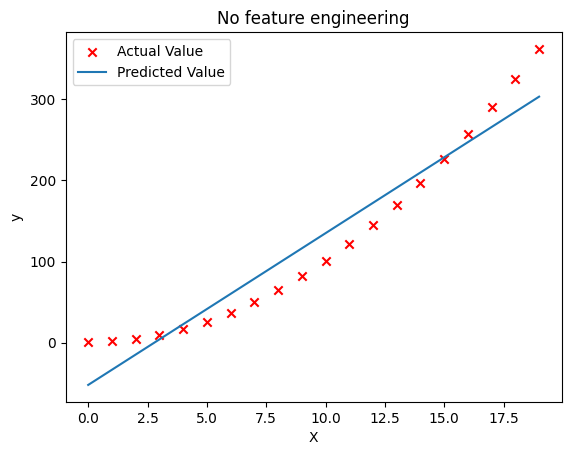

In [26]:
plt.scatter(x, y, marker='x', c='r', label='Actual Value')
plt.title("No feature engineering")

plt.plot(x, (np.dot(X, model_w) + model_b), label='Predicted Value')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [27]:
x = np.arange(0, 20, 1)
y = 1 + x**2

# Engineering features
X = x**2  # added engineered feature

X = X.reshape(-1, 1)  # X should be a 2-D Matrix
model_w, model_b = run_gradient_descent(X, y, num_iters=10000, alpha = 1e-5)

Iteration:         0, Cost: 7.32922e+03
Iteration:      1000, Cost: 2.24844e-01
Iteration:      2000, Cost: 2.22795e-01
Iteration:      3000, Cost: 2.20764e-01
Iteration:      4000, Cost: 2.18752e-01
Iteration:      5000, Cost: 2.16758e-01
Iteration:      6000, Cost: 2.14782e-01
Iteration:      7000, Cost: 2.12824e-01
Iteration:      8000, Cost: 2.10884e-01
Iteration:      9000, Cost: 2.08962e-01
Final w and b found by the gradient descent w: [1.], b: 0.0490


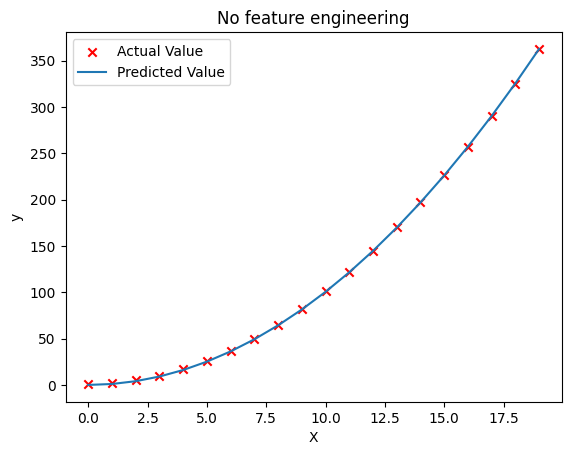

In [28]:
plt.scatter(x, y, marker='x', c='r', label='Actual Value')
plt.title("No feature engineering")

plt.plot(x, (np.dot(X, model_w) + model_b), label='Predicted Value')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

******
**Selecting Features**

In [31]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features
X = np.c_[x, x**2, x**3]  # added engineered feature

model_w, model_b = run_gradient_descent(X, y, num_iters=10000, alpha=1e-7)

Iteration:         0, Cost: 1.14029e+03
Iteration:      1000, Cost: 3.28539e+02
Iteration:      2000, Cost: 2.80443e+02
Iteration:      3000, Cost: 2.39389e+02
Iteration:      4000, Cost: 2.04344e+02
Iteration:      5000, Cost: 1.74430e+02
Iteration:      6000, Cost: 1.48896e+02
Iteration:      7000, Cost: 1.27100e+02
Iteration:      8000, Cost: 1.08495e+02
Iteration:      9000, Cost: 9.26132e+01
Final w and b found by the gradient descent w: [0.08 0.54 0.03], b: 0.0106


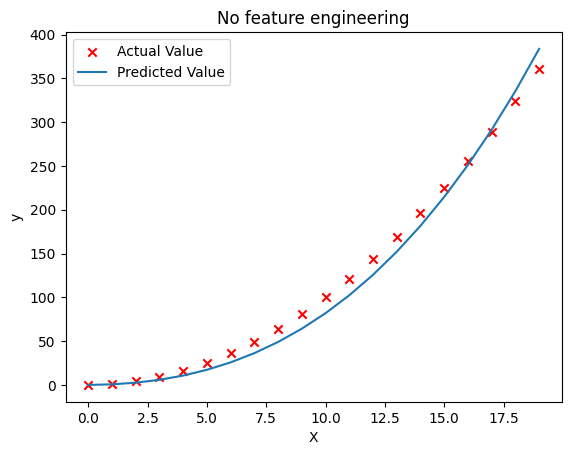

In [32]:
plt.scatter(x, y, marker='x', c='r', label='Actual Value')
plt.title("No feature engineering")

plt.plot(x, (np.dot(X, model_w) + model_b), label='Predicted Value')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

******
**Alternate View**

In [33]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features.
X = np.c_[x, x**2, x**3]  # added engineered feature
X_features = ['x', 'x^2', 'x^3']

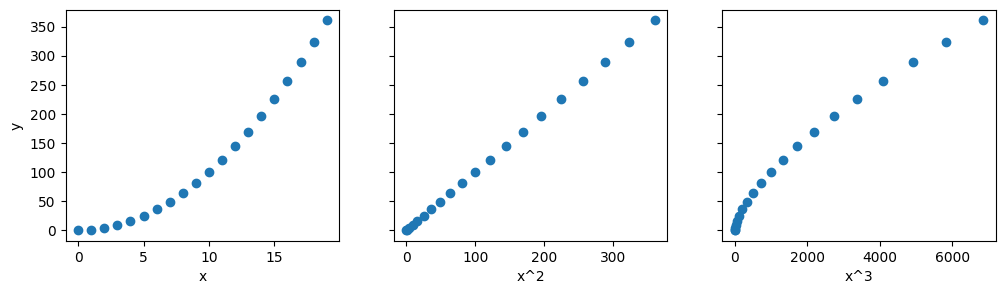

In [37]:
fig, ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
  ax[i].scatter(X[:, i], y)
  ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel('y')
plt.show()

******
**Zscore Normalization**

In [38]:
def zscore_normalize_features(X, rtn_ms=False):
  """
  Return z-score normalized X by column
  Args:
    X: numpy array (m, n)
  Return:
    X_norm: (numpy array(m, n)) input normalized by column
  """

  mu = np.mean(X, axis = 0)
  sigma = np.std(X, axis = 0)
  X_norm = (X - mu) / sigma

  if rtn_ms:
    return (X_norm, mu, sigma)
  else:
    return (X_norm)

******
**Scaling features**

In [39]:
x = np.arange(0, 20, 1)
X = np.c_[x, x**2, x**3]
print(f"Peak to peak range by column in Raw        X: {np.ptp(X,axis=0)}")

# add mean_normalization
X = zscore_normalize_features(X)
print(f"Peak to peak range by column in Normalized X: {np.ptp(X,axis=0)}")

Peak to peak range by column in Raw        X: [  19  361 6859]
Peak to peak range by column in Normalized X: [3.3  3.18 3.28]


In [40]:
x = np.arange(0, 20, 1)
y = x**2

X = np.c_[x, x**2, x**3]
X = zscore_normalize_features(X)

model_w, model_b = run_gradient_descent(X, y, num_iters=100000, alpha=1e-1)

Iteration:         0, Cost: 9.42147e+03
Iteration:     10000, Cost: 3.90938e-01
Iteration:     20000, Cost: 2.78389e-02
Iteration:     30000, Cost: 1.98242e-03
Iteration:     40000, Cost: 1.41169e-04
Iteration:     50000, Cost: 1.00527e-05
Iteration:     60000, Cost: 7.15855e-07
Iteration:     70000, Cost: 5.09763e-08
Iteration:     80000, Cost: 3.63004e-09
Iteration:     90000, Cost: 2.58497e-10
Final w and b found by the gradient descent w: [5.27e-05 1.13e+02 8.43e-05], b: 123.5000


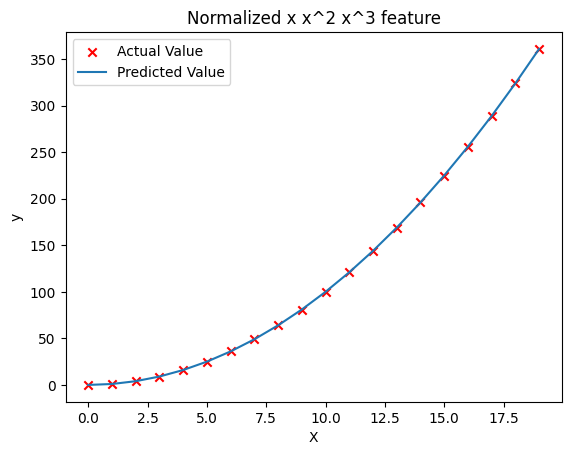

In [44]:
plt.scatter(x, y, marker='x', c='r', label='Actual Value')
plt.title("Normalized x x^2 x^3 feature")

plt.plot(x, (np.dot(X, model_w) + model_b), label='Predicted Value')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

******
**Complex Function**

In [53]:
x = np.arange(0, 20, 1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X = zscore_normalize_features(X)

model_w, model_b = run_gradient_descent(X, y, 1000000, alpha = 1e-1)

Iteration:         0, Cost: 2.20188e-01
Iteration:    100000, Cost: 1.70074e-02
Iteration:    200000, Cost: 1.27603e-02
Iteration:    300000, Cost: 9.73032e-03
Iteration:    400000, Cost: 7.56440e-03
Iteration:    500000, Cost: 6.01412e-03
Iteration:    600000, Cost: 4.90251e-03
Iteration:    700000, Cost: 4.10351e-03
Iteration:    800000, Cost: 3.52730e-03
Iteration:    900000, Cost: 3.10989e-03
Final w and b found by the gradient descent w: [ -1.34 -10.    24.78   5.96 -12.49 -16.26  -9.51   0.59   8.7   11.94
   9.27   0.79 -12.82], b: -0.0073


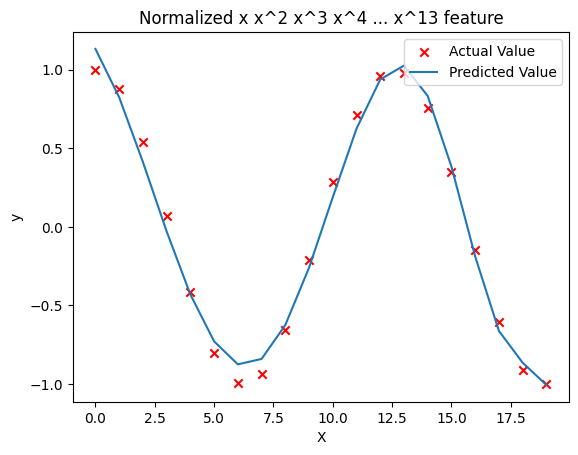

In [56]:
plt.scatter(x, y, marker='x', c='r', label='Actual Value')
plt.title("Normalized x x^2 x^3 x^4 ... x^13 feature")

plt.plot(x, (np.dot(X, model_w) + model_b), label='Predicted Value')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()